<a href="https://colab.research.google.com/github/MouhabDouzi/Projects/blob/main/football_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [7]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mouhabdouzi","key":"1dc3ad008a778e7713f12c161913f25e"}'}

In [8]:
!ls


kaggle.json  sample_data


In [9]:
import os

# Create the directory for the Kaggle configuration if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the kaggle.json file to the correct location
!mv kaggle.json /root/.kaggle/

# Set the correct permissions for the file
!chmod 600 /root/.kaggle/kaggle.json


In [10]:
!ls /root/.kaggle/


kaggle.json


In [15]:
!kaggle datasets download -d abecklas/fifa-world-cup


Dataset URL: https://www.kaggle.com/datasets/abecklas/fifa-world-cup
License(s): CC0-1.0
  0% 0.00/349k [00:00<?, ?B/s]
100% 349k/349k [00:00<00:00, 97.1MB/s]


In [16]:
!unzip fifa-world-cup.zip


Archive:  fifa-world-cup.zip
  inflating: WorldCupMatches.csv     
  inflating: WorldCupPlayers.csv     
  inflating: WorldCups.csv           


In [19]:
!ls


fifa-world-cup.zip  sample_data  WorldCupMatches.csv  WorldCupPlayers.csv  WorldCups.csv


In [20]:
import pandas as pd

# Load each CSV file into a DataFrame
matches_df = pd.read_csv("WorldCupMatches.csv")
players_df = pd.read_csv("WorldCupPlayers.csv")
worldcups_df = pd.read_csv("WorldCups.csv")

# Display the first few rows of each DataFrame to ensure they are loaded correctly
print(matches_df.head())
print(players_df.head())
print(worldcups_df.head())


     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0

In [23]:
import os

# List the files in the current directory
os.listdir('/content')


['.config',
 'WorldCupMatches.csv',
 'WorldCupPlayers.csv',
 'WorldCups.csv',
 'fifa-world-cup.zip',
 'sample_data']

In [24]:
import pandas as pd

# Load the datasets
matches_df = pd.read_csv("/content/WorldCupMatches.csv")
players_df = pd.read_csv("/content/WorldCupPlayers.csv")
worldcups_df = pd.read_csv("/content/WorldCups.csv")

# Display the first few rows of each dataset
print("Matches DataFrame:")
print(matches_df.head())

print("\nPlayers DataFrame:")
print(players_df.head())

print("\nWorld Cups DataFrame:")
print(worldcups_df.head())


Matches DataFrame:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0 

In [25]:
# Check for missing values in each dataset
print("Missing values in Matches DataFrame:")
print(matches_df.isnull().sum())

print("\nMissing values in Players DataFrame:")
print(players_df.isnull().sum())

print("\nMissing values in World Cups DataFrame:")
print(worldcups_df.isnull().sum())

# Convert 'Datetime' column in Matches DataFrame to proper datetime format
matches_df['Datetime'] = pd.to_datetime(matches_df['Datetime'], errors='coerce')

# Drop unnecessary columns (example: 'Referee', 'Assistant 1', 'Assistant 2' if not needed)
matches_df_cleaned = matches_df.drop(columns=['Referee', 'Assistant 1', 'Assistant 2'])

# Display cleaned dataset
print("\nCleaned Matches DataFrame (first 5 rows):")
print(matches_df_cleaned.head())


Missing values in Matches DataFrame:
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

Missing values in Players DataFrame:
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

Missing values in World Cups DataFrame:
Year              0
Country           0
Winner            0
Runners-Up 


Basic Statistics for Matches DataFrame:
       Home Team Goals  Away Team Goals     Attendance
count       852.000000       852.000000     850.000000
mean          1.811033         1.022300   45164.800000
std           1.610255         1.087573   23485.249247
min           0.000000         0.000000    2000.000000
25%           1.000000         0.000000   30000.000000
50%           2.000000         1.000000   41579.500000
75%           3.000000         2.000000   61374.500000
max          10.000000         7.000000  173850.000000


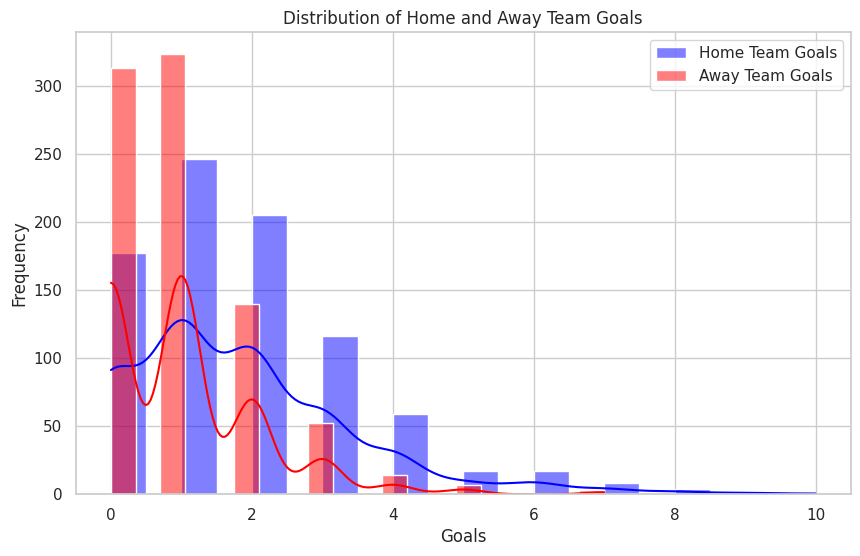

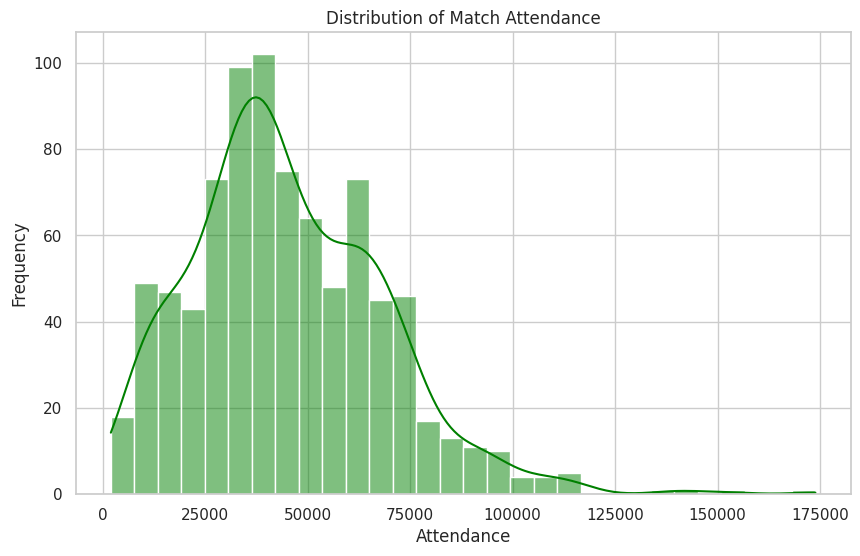

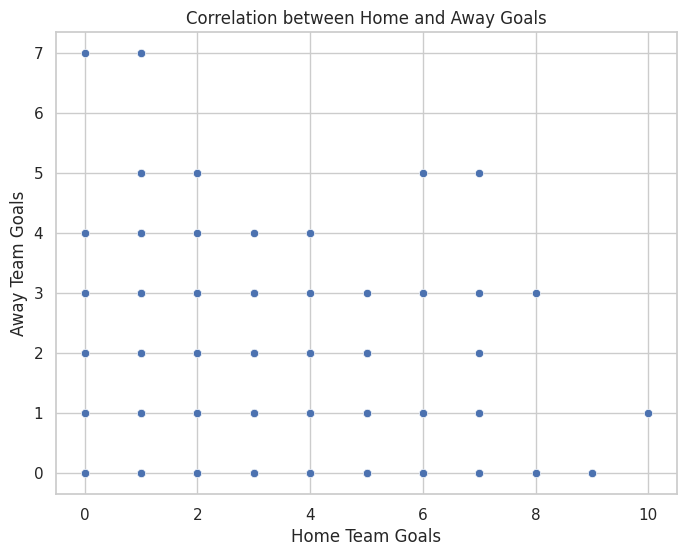

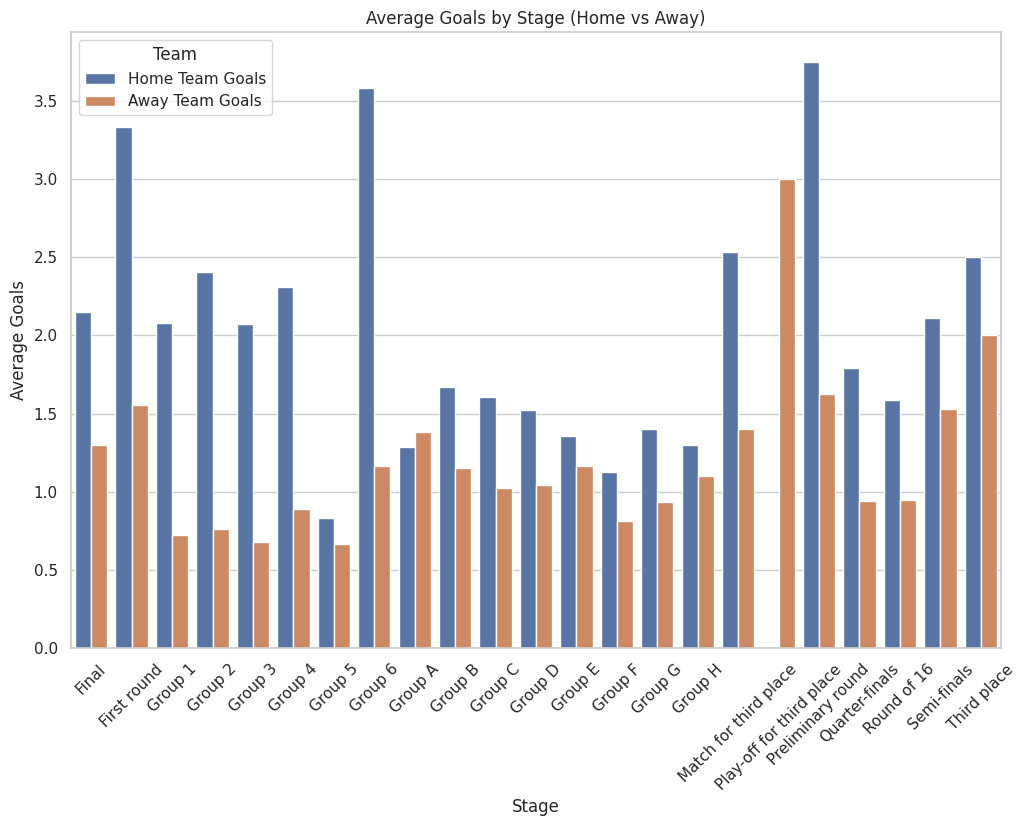

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Basic Statistics for the Matches DataFrame
print("\nBasic Statistics for Matches DataFrame:")
print(matches_df_cleaned[['Home Team Goals', 'Away Team Goals', 'Attendance']].describe())

# 2. Visualize the number of goals scored by both teams (Home vs. Away)
plt.figure(figsize=(10, 6))
sns.histplot(matches_df_cleaned['Home Team Goals'], color='blue', kde=True, label="Home Team Goals", bins=20)
sns.histplot(matches_df_cleaned['Away Team Goals'], color='red', kde=True, label="Away Team Goals", bins=20)
plt.title("Distribution of Home and Away Team Goals")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 3. Plot the Attendance at Matches
plt.figure(figsize=(10, 6))
sns.histplot(matches_df_cleaned['Attendance'], color='green', kde=True, bins=30)
plt.title("Distribution of Match Attendance")
plt.xlabel("Attendance")
plt.ylabel("Frequency")
plt.show()

# 4. Correlation between Home Goals and Away Goals (if any)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Home Team Goals', y='Away Team Goals', data=matches_df_cleaned)
plt.title("Correlation between Home and Away Goals")
plt.xlabel("Home Team Goals")
plt.ylabel("Away Team Goals")
plt.show()

# 5. Relationship between Stage and Goals Scored (Home & Away)
plt.figure(figsize=(12, 8))
stage_goals = matches_df_cleaned.groupby('Stage')[['Home Team Goals', 'Away Team Goals']].mean().reset_index()
stage_goals = stage_goals.melt(id_vars="Stage", value_vars=["Home Team Goals", "Away Team Goals"], var_name="Team", value_name="Average Goals")
sns.barplot(x="Stage", y="Average Goals", hue="Team", data=stage_goals)
plt.title("Average Goals by Stage (Home vs Away)")
plt.xlabel("Stage")
plt.ylabel("Average Goals")
plt.xticks(rotation=45)
plt.show()


In [27]:
# 1. Creating a new feature for Match Outcome (Home Team Win, Away Team Win, Draw)
def match_outcome(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 'Home Win'
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return 'Away Win'
    else:
        return 'Draw'

matches_df_cleaned['Match Outcome'] = matches_df_cleaned.apply(match_outcome, axis=1)

# 2. Creating a feature for Goal Difference
matches_df_cleaned['Goal Difference'] = matches_df_cleaned['Home Team Goals'] - matches_df_cleaned['Away Team Goals']

# 3. Extracting Match Duration from the Datetime column (if relevant)
# Assuming match duration is fixed (e.g., 90 minutes for regular matches)
matches_df_cleaned['Match Duration'] = 90

# 4. Calculating average attendance per team
average_attendance = matches_df_cleaned.groupby('Home Team Name')['Attendance'].mean().reset_index()
average_attendance.rename(columns={'Attendance': 'Average Attendance'}, inplace=True)
matches_df_cleaned = pd.merge(matches_df_cleaned, average_attendance, on='Home Team Name', how='left')

# Preview the new features
print(matches_df_cleaned[['Match Outcome', 'Goal Difference', 'Match Duration', 'Average Attendance']].head())


  Match Outcome  Goal Difference  Match Duration  Average Attendance
0      Home Win              3.0              90        41870.677419
1      Home Win              3.0              90        43862.666667
2      Home Win              1.0              90        25391.352941
3      Home Win              2.0              90        52907.111111
4      Home Win              1.0              90        53981.981481


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
X = matches_df_cleaned[['Home Team Goals', 'Away Team Goals', 'Goal Difference', 'Average Attendance']]
y = matches_df_cleaned['Match Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

    Away Win       1.00      1.00      1.00        39
        Draw       1.00      1.00      1.00       762
    Home Win       1.00      1.00      1.00       114

    accuracy                           1.00       915
   macro avg       1.00      1.00      1.00       915
weighted avg       1.00      1.00      1.00       915



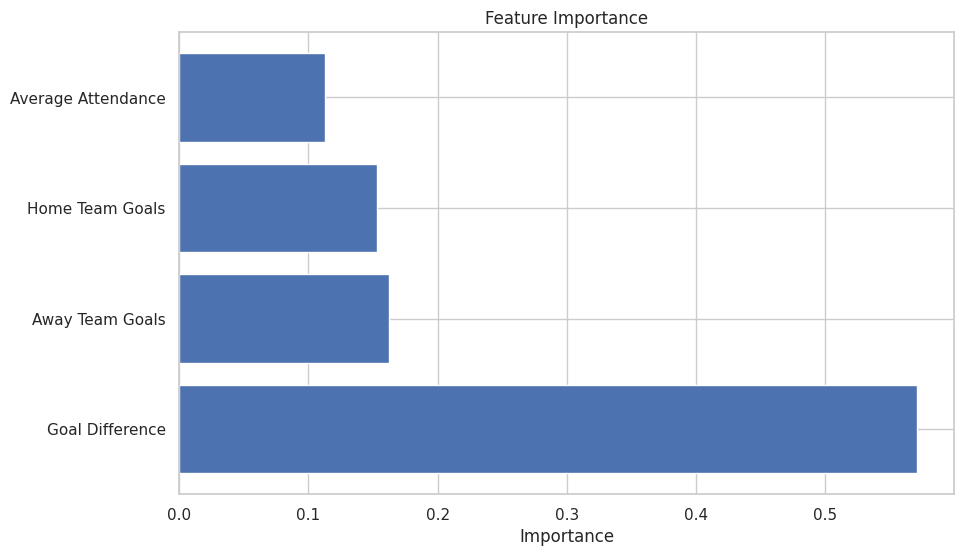

In [29]:
import matplotlib.pyplot as plt

# Get feature importance from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame for visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()
